## Task - 15 : Practical Task on EDA using Titanic CSV file

In [194]:
# Import all the required libraries

import numpy as np 
import pandas as pd 


# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt

In [195]:
# Read the CSV file and look the at the first 5 observations
df = pd.read_csv("Titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [196]:
# Look at the datatypes of each of the columns to classify the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see above there are 7 numerical columns and 5 non-numerical columns

In [197]:
# Get the general statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the above statitics we can see average mean and mode of age of the passengers is around 28 which means most of the passengers are around that age.

In [198]:
# Look at the number of rows and columns loaded in the dataframe
df.shape

(891, 12)

### Univariate Analysis of the columns in the dataframe

In [199]:
# Look at the missing values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

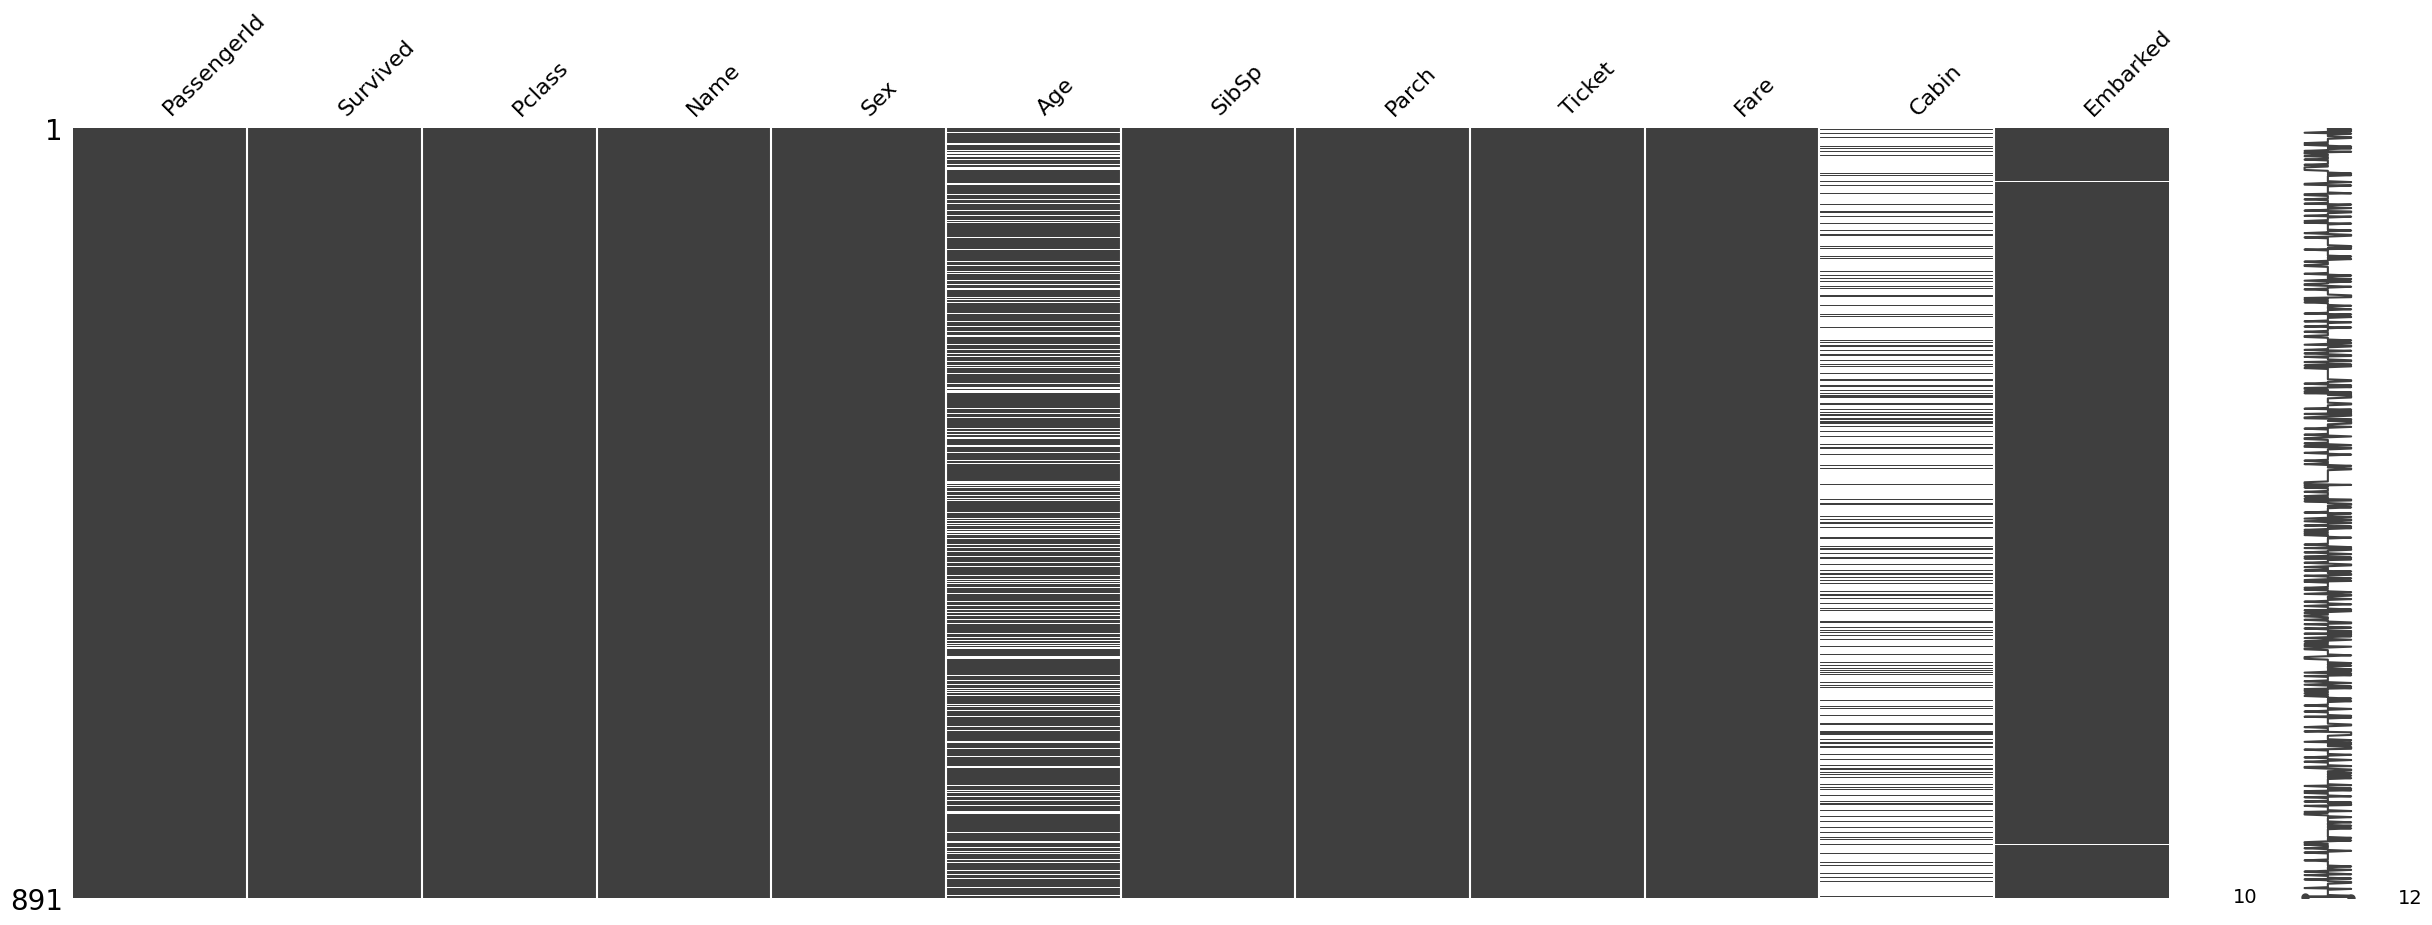

In [98]:
# Plot graphic of missing values
missingno.matrix(df, figsize = (30,10))

As you can see in the above output, there are three columns ie., Age, Cabin and Embarked columns are having null values. 

Age is an important column which is required to determine the target variable, so we have to find an option to fix the missing values. Then we will focus on other columns.


<Axes: xlabel='Age', ylabel='Count'>

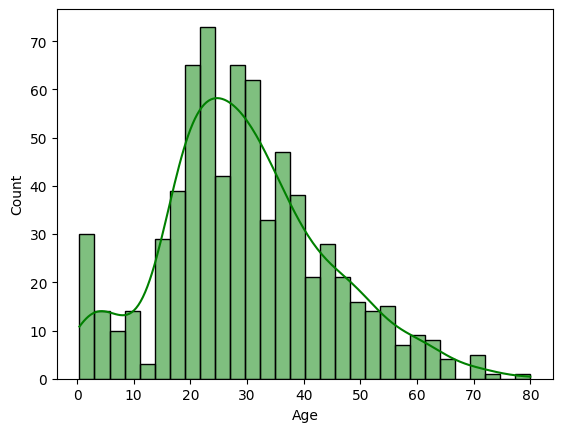

In [201]:
# Create an histplot for Age 
sns.histplot(df['Age'], bins = 30, color='g', kde = True) 

<Axes: xlabel='Age', ylabel='Density'>

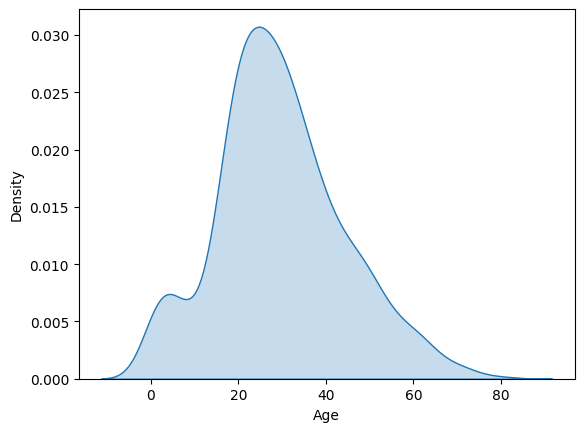

In [202]:
# Create a kdeplot for age to see the distribution of observations of Age feature 
sns.kdeplot(df["Age"], fill = True)

From the above graphs, we can see observations for Age column is a skewed distribution. As this feature  is important for target variable, we can  replace the missing values with median value of the age column.


In [203]:
# Replace null values in Age column with median value of all passenger's age 
df["Age"] = df["Age"].fillna(df["Age"].median())

Now let's look at Embarked column which denotes the port of embarkation. As this is a nominal categorical value and only very few observations are missing, we will replace with the most frequent value instead of deleting the rows of the missing value. Let's do a histplot to see the frequent value.

<Axes: xlabel='Embarked', ylabel='Count'>

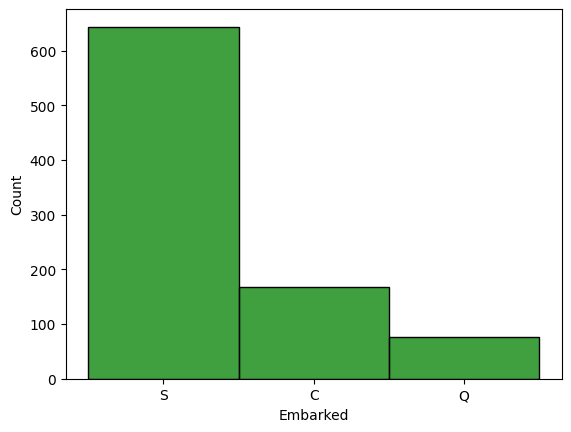

In [205]:
sns.histplot(df['Embarked'], color = 'g')

In [206]:
# Replace missing values in Embarked column with mode
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

Now let's look at Cabin column values. As this column has many missing values, let's look at number of unique values of this column.

In [207]:
df['Cabin'].nunique()

147

Looking at above count, it clearly indicates this is high-cardinality variable with large number of unique categories. As this column is not at all related to passenger target variable of survival or not, we can ignore this column for now.  

Sex
male      577
female    314
Name: count, dtype: int64


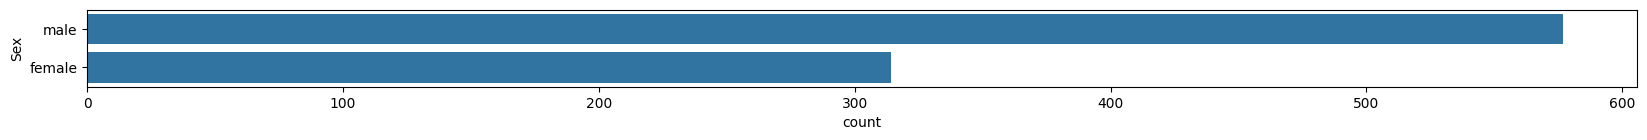

In [208]:
# How many passengers are Male and Female in the dataframe?
fig = plt.figure(figsize=(20,1))
sns.countplot(y = 'Sex', data = df);
print(df.Sex.value_counts())

Looking at above stats, number of male is 577 and female is 314.

<Axes: xlabel='Sex', ylabel='Age'>

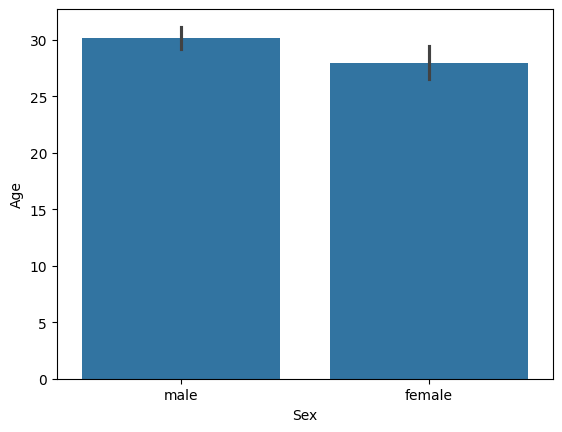

In [213]:
# Lets look at barplot to see average age, by gender
sns.barplot(data = df, x = 'Sex', y = 'Age')

Looking at above graph average age of both male and female is almost same ie., between 27 to 30

<Axes: >

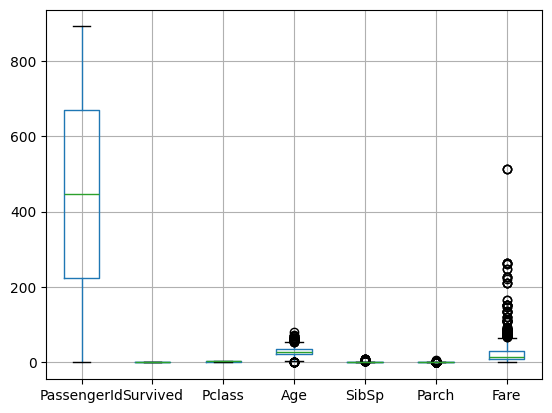

In [212]:
# Create a boxplot to see if there are any outliers
df.boxplot()

The above boxplot shows there are few outliers in Age, SibSp and Parch features. Also, there are many outliers in Fare feature.

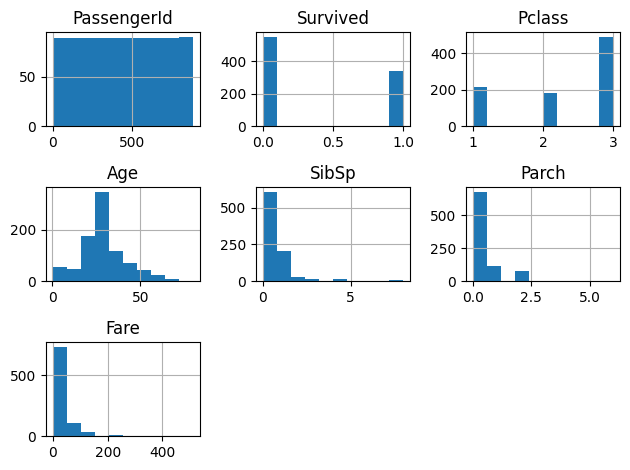

In [214]:
# Let create a histogram for all numerical columns to get a general understing of the data
df.hist()
plt.tight_layout()

From the above graphs we can observe the following:
1. More number of peopele died (Survived = 0)
2. Passenger 3rd class is more compared with 1st and 2nd class
3. Most of the passengers age is around 30


## Bivariate analysis

Now we can do bivariate analysis to determine the releationship between two variables.

For this, do a scatter plot to visualize the relationship between features and target

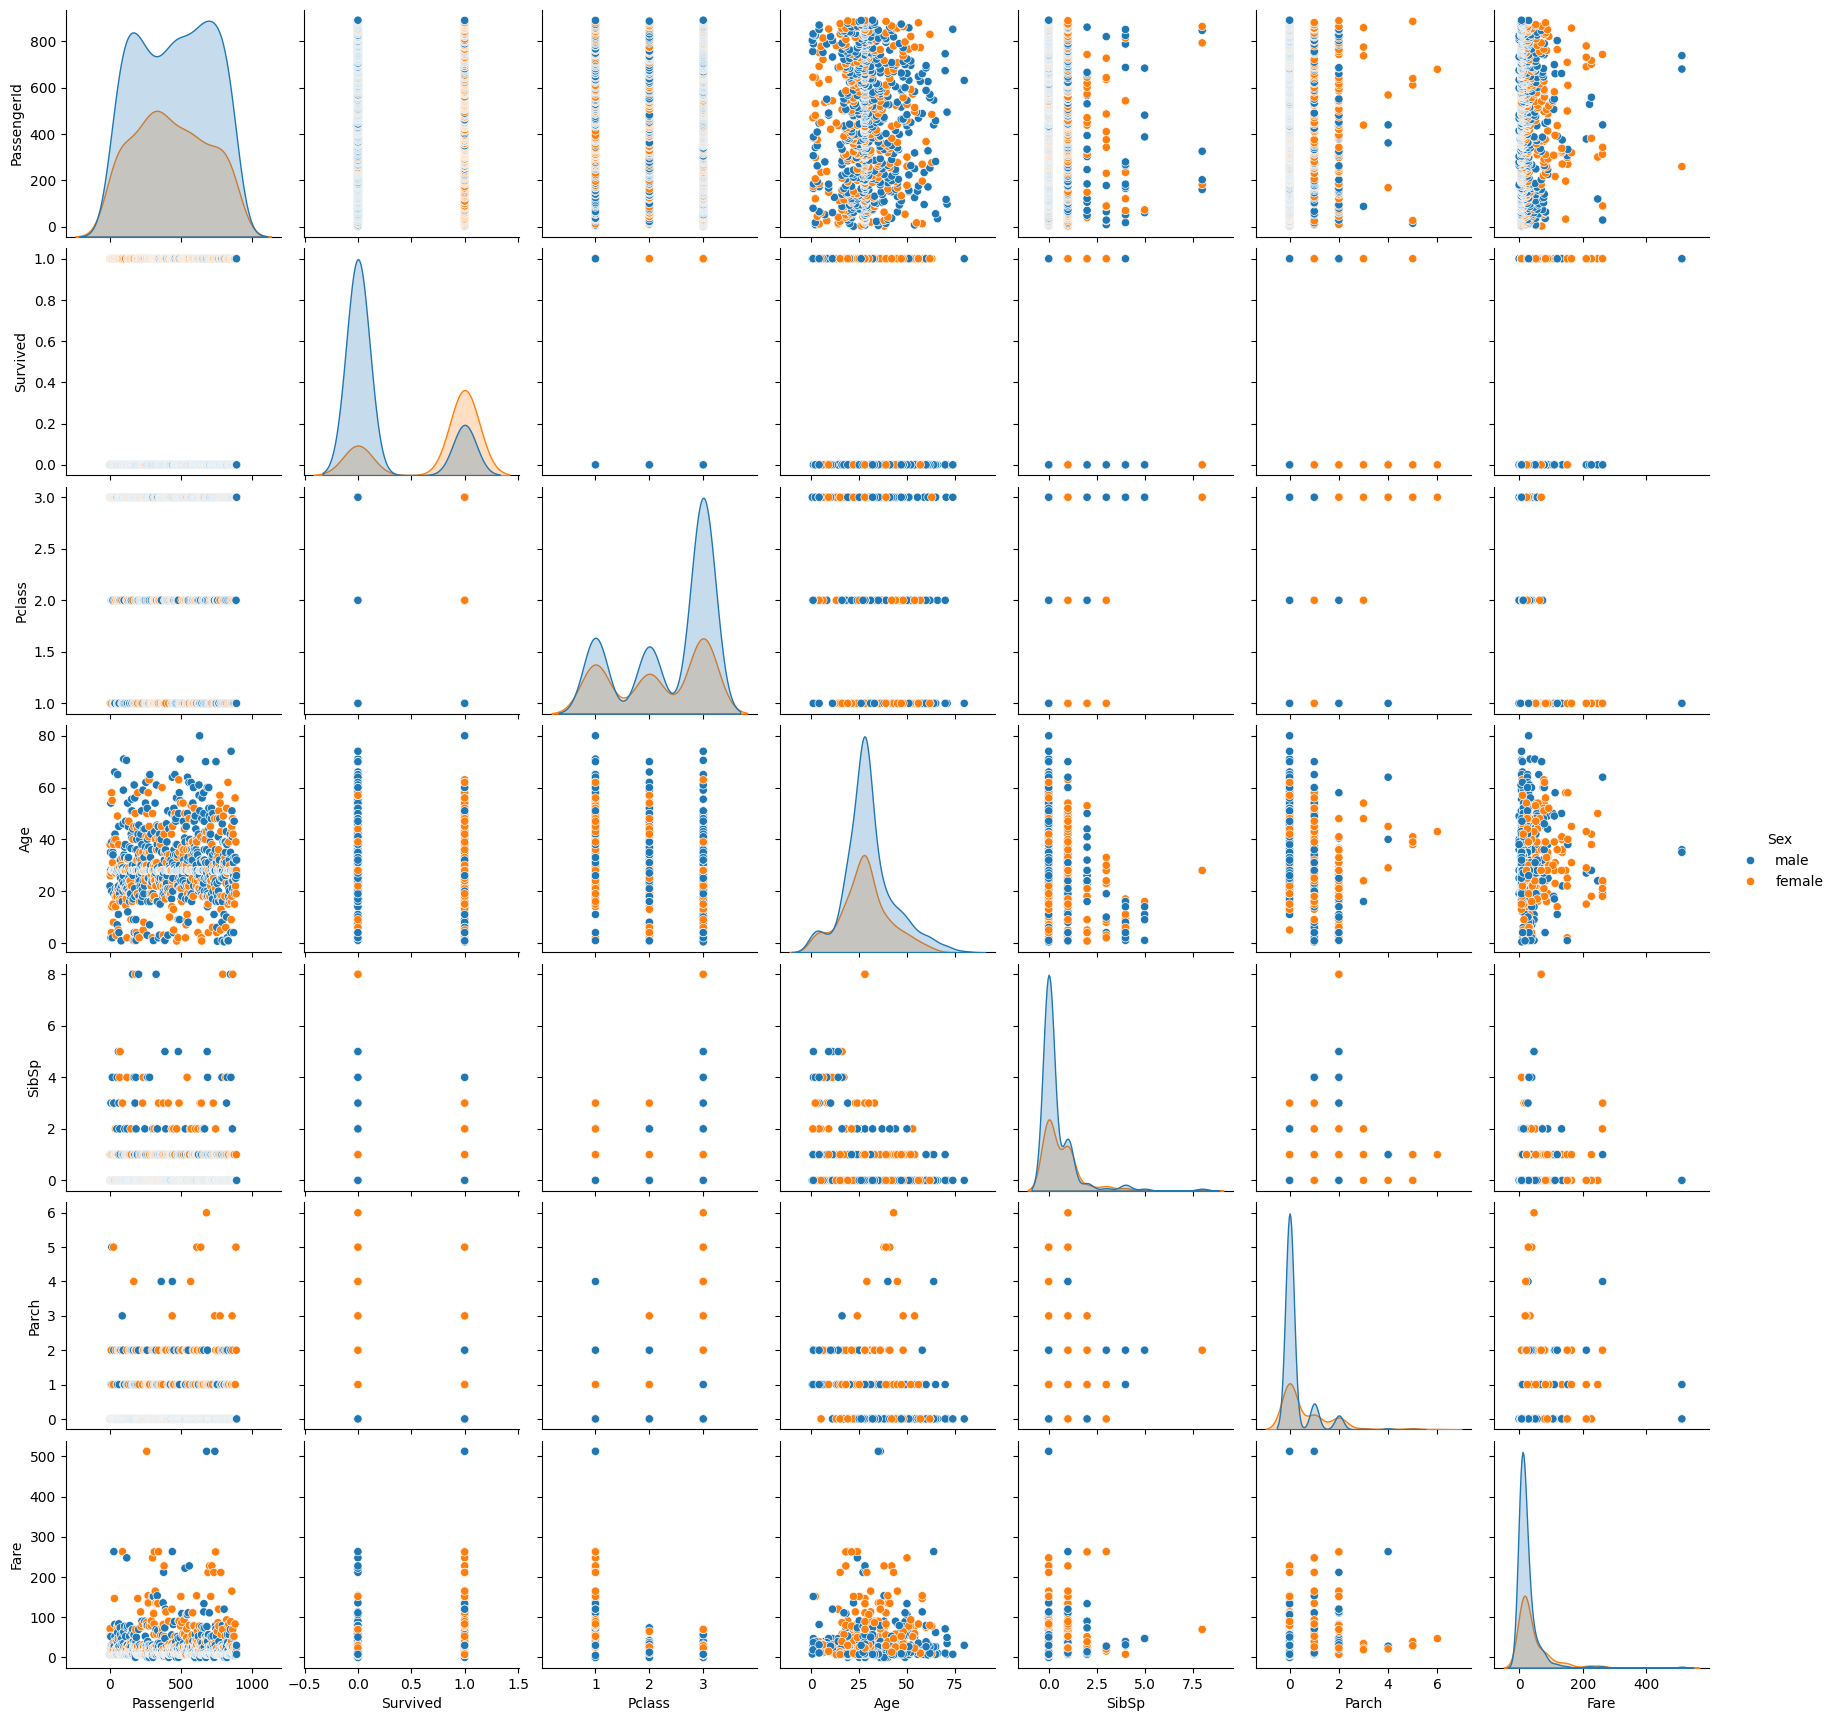

In [215]:
sns.pairplot(data = df, hue = 'Sex')

Above pairplot shows correlation of various features. 

Let's look at correlation of various features with numerical values below:

In [216]:
# Drop non-numeric columns
new_df = df.drop(columns = ["Name","Sex","Ticket","Cabin","Embarked"])

<Axes: >

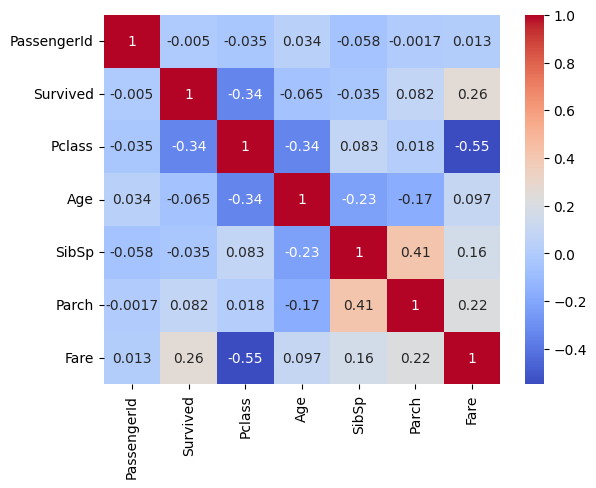

In [217]:
# Create correlation matrix and display heatmap
corr_matrix = new_df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm' )

Above correlation matrix donesn't show any strong positive correlation for our target variable 'Survived'. But it shows somewhat weaker/ moderate negative correlation with Age & passenger class.

Now lets look into other variables:

<Axes: xlabel='Sex', ylabel='count'>

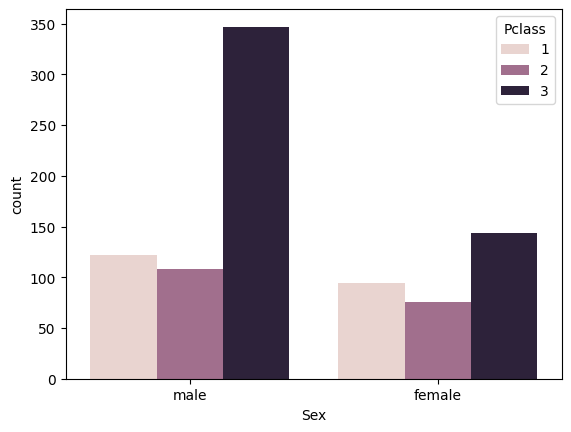

In [218]:
# Look at the count of passenger class for each gender
sns.countplot(data = df, x = 'Sex', hue = 'Pclass')


You can see above more male in 3rd class, but other classes not much difference in count. Overall, more male passengers are more in all three classes.

<Axes: xlabel='Sex', ylabel='count'>

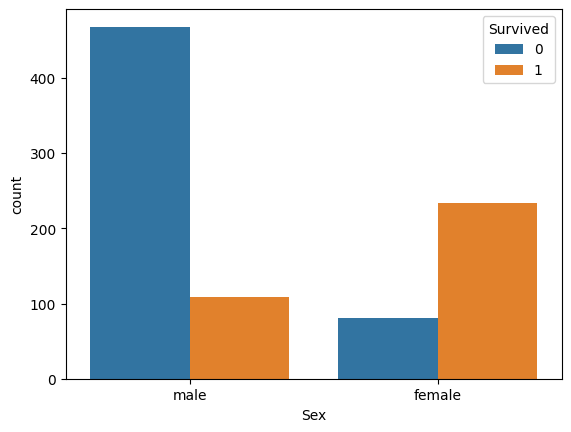

In [219]:
# Look at the count of survived passengers for each gender
sns.countplot(data = df, x = 'Sex', hue = 'Survived')

As you can see above more female passengers survived then male.

<Axes: xlabel='Pclass', ylabel='count'>

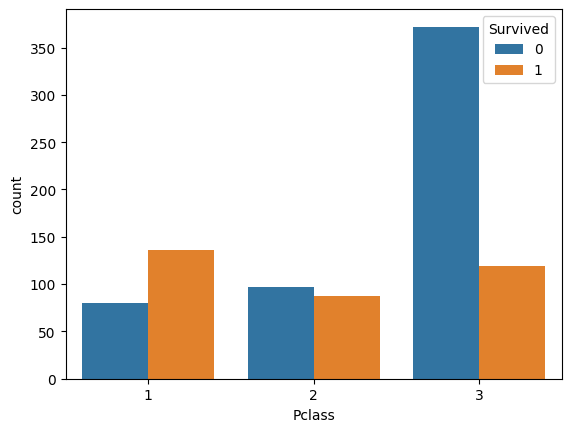

In [220]:
# Look at the count of survived passengers by passenger classwise 
sns.countplot(data = df, x = 'Pclass', hue = 'Survived')

Looking at above countplot, we can see more number of 1st class passengers survived than 2nd and 3rd class.

<Axes: xlabel='Sex', ylabel='Survived'>

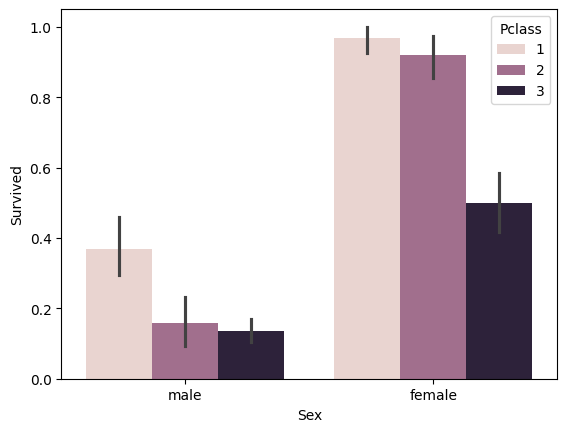

In [221]:
# Look at barplot for survival for each gender and passenger class 
sns.barplot(data = df, x = 'Sex', y = 'Survived', hue = 'Pclass')


The above barplot clearly indicates that the probability of 1st and 2nd class female passengers likely to survive 50% more than the 3rd class female passengers.

Now let's look into data in Age column:

<Axes: xlabel='count', ylabel='Age_group'>

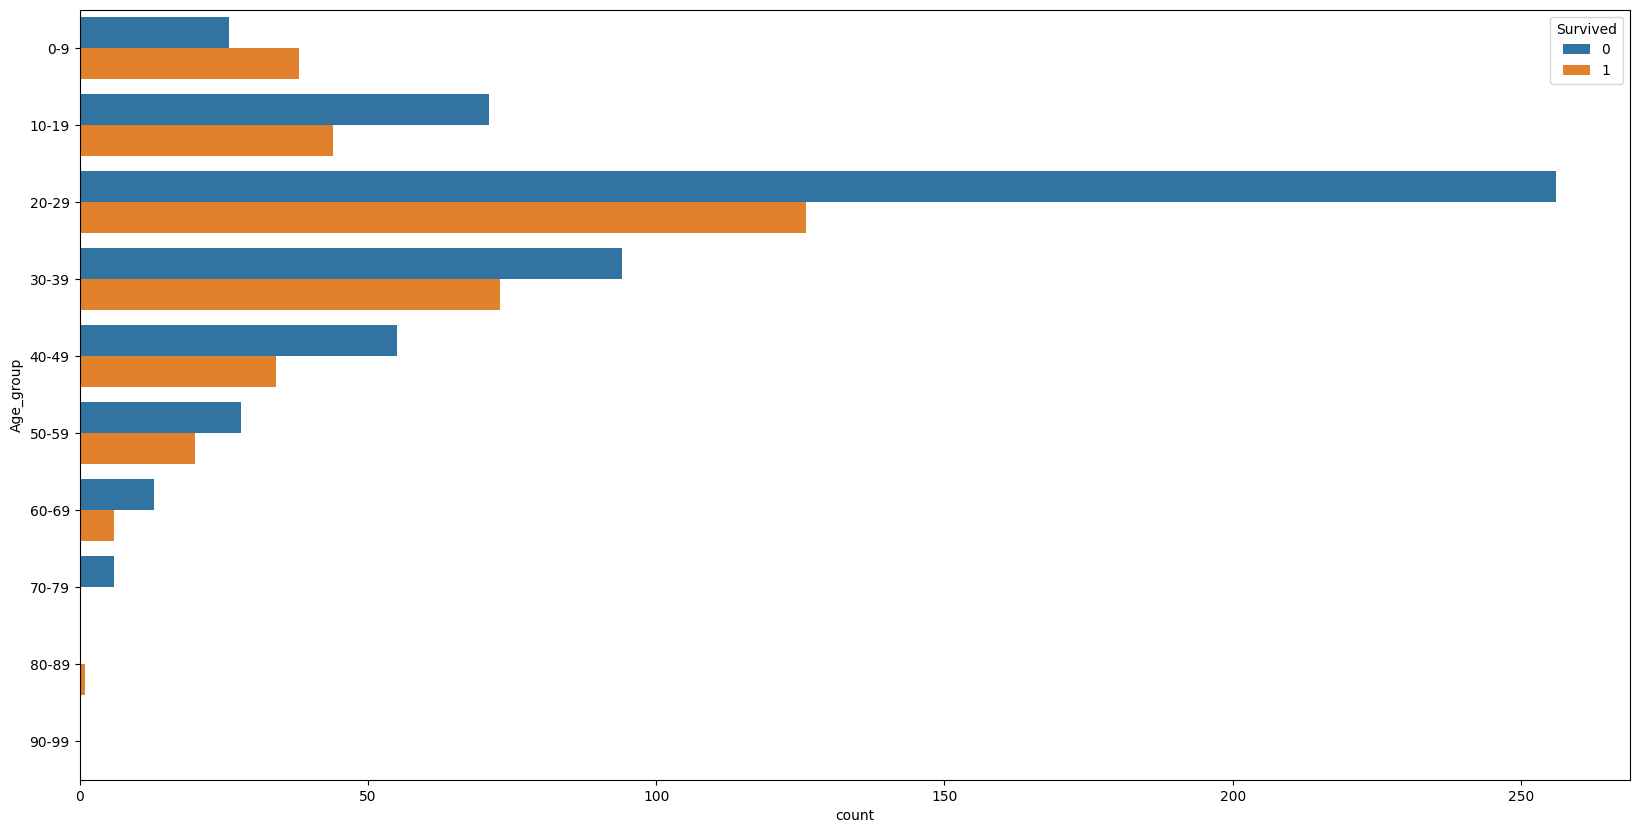

In [222]:
# As there are so many variations in Age observations, let's group the age by 10 years by creating a column and determine 
# which age group surived mostly by creating a countplot

df['Age_group'] = pd.cut(df['Age'], [0,10,20,29,39,49,59,69,79,89,99], 
                   labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79',
                           '80-89','90-99'])

fig = plt.figure(figsize=(20,10))
sns.countplot(data = df, y = df['Age_group'], hue = 'Survived')

From the above countplot, we can see that age group 0-9 passenger survival count is more than the number of deaths in that group.
Also, passengers falling under age group 70-79 not survived at all and more number of passengers survived under age group 20-29.

From all the above analysis and visualisation we can see that:

1. Age and passenger class are the most important in determining the survial of Titanic incident.

2. Upper-class (1st class) passengers survival count is more as they were given preference on lifeboats.



3. As more number of female passengers survived and childrens in the age group 0-9 survived, we can say that women and children were given preference.

4. Probability of 1st and 2nd class female passengers likely to survive 50% more than the 3rd class female passengers.